<a href="https://colab.research.google.com/github/LeonVillanueva/CoLab/blob/master/Google_Colab_XGB_PIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from xgboost import XGBClassifier as XGBC

In [0]:
import numpy as np
import pandas as pd

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [37]:
!unzip -q original.zip

replace pima.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
data = pd.read_csv ('pima.csv', header=None)

In [39]:
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
X = data.iloc[:,:8].values
y = data.iloc[:,-1].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state=23)

In [0]:
sc = StandardScaler ()

In [0]:
sc.fit (X_train)
X_train = sc.transform (X_train)

In [0]:
X_test = sc.transform (X_test)

In [58]:
model = XGBC (learning_rate=0.5, max_depth=7, gamma=1, eval='error')
model.fit (X_train, y_train, verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval='error', gamma=1,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = model.predict (X_test)

In [60]:
accuracy_score (y_test, y_pred), accuracy_score (model.predict (X_train), y_train)

(0.828125, 0.9982638888888888)

In [0]:
kfold = StratifiedKFold (n_splits=10, shuffle=True, random_state=23)
results = cross_val_score (model, X, y, cv=kfold)

In [62]:
results.mean(), results.std()

(0.7421565276828435, 0.03447921595112528)

In [0]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

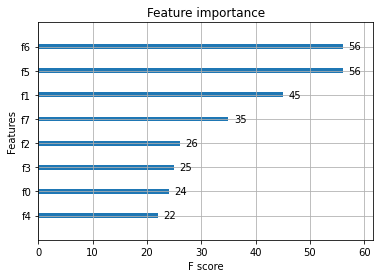

In [64]:
plot_importance (model)
plt.show()